<a href="https://colab.research.google.com/github/filipecarbonera/Waiters-Tips-Prediction/blob/main/Waiter's_Tips_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waiter's Tips Prediction

[Link para o repositório no Github.](https://github.com/filipecarbonera/Waiters-Tips-Prediction)

In [ ]:
# Importing libs.
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignoring warnings.
warnings.filterwarnings('ignore')

In [ ]:
# The complete dataset.
data = pd.read_csv('https://raw.githubusercontent.com/filipecarbonera/Waiters-Tips-Prediction/main/tips.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [ ]:
# Looking for features, data types and null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [ ]:
# Creating a copy and simplifying the dataset to do the first analysis and prediction.
data1 = data.copy()
data1 = data[['total_bill','sex','smoker','day','time','size','tip']]
data1.head()

,total_bill,sex,smoker,day,time,size,tip
0,16.99,Female,No,Sun,Dinner,2,1.01
1,10.34,Male,No,Sun,Dinner,3,1.66
2,21.01,Male,No,Sun,Dinner,3,3.50
3,23.68,Male,No,Sun,Dinner,2,3.31
4,24.59,Female,No,Sun,Dinner,4,3.61


In [ ]:
# Visualizing the distribution of tips by day.
px.bar(data_frame=data1,x='day',y='tip', color='day',width=800, height=400)

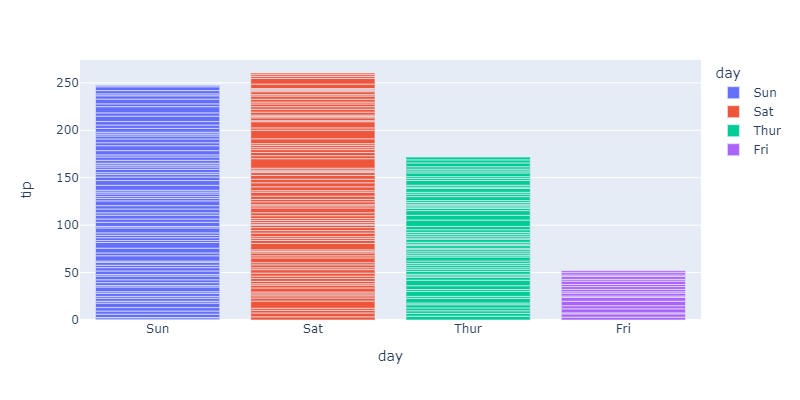

We can clearly see that the majority of tips are given during the weekend.

In [ ]:
# Visualizing the distribution of tips by sex.
px.bar(data_frame=data1,x='sex',y='tip', color='sex',width=800, height=400)

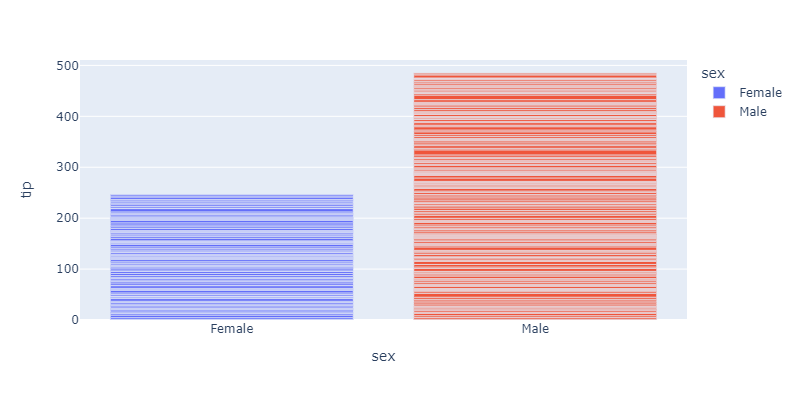

Most tips are given by man.

In [ ]:
# Visualizing the distribution of tips by smoker.
px.bar(data_frame=data1,x='smoker',y='tip', color='smoker',width=800, height=400)

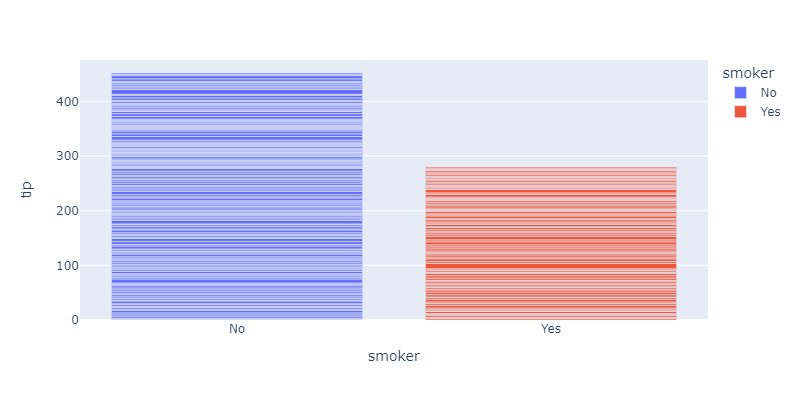

Most tips are given by non smokers.

In [ ]:
# Visualizing the distribution of tips by time.
px.bar(data_frame=data1,x='time',y='tip', color='time',width=800, height=400)

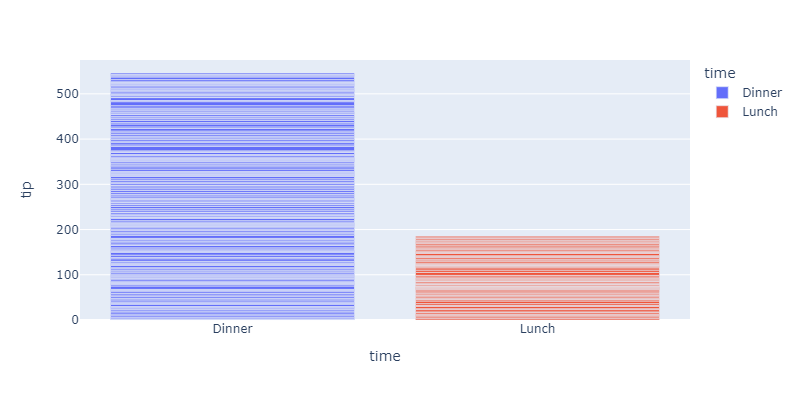

Most tips are given at dinner.

In [ ]:
# Visualizing the relationship between total_bill and day with the tip.
px.scatter(data_frame = data1, x='total_bill', y='tip', size='size', color= 'day', trendline='ols',width=800, height=400)

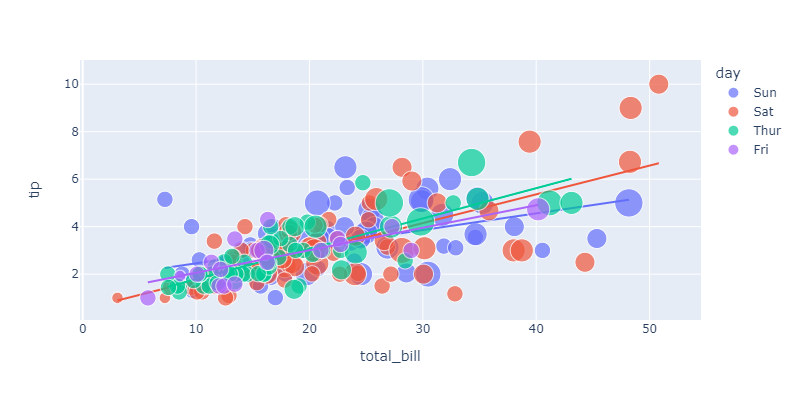

In [ ]:
# Visualizing the relationship between total_bill and sex with the tip.
px.scatter(data_frame = data1, x='total_bill', y='tip', size='size', color= 'sex', trendline='ols',width=800, height=400)

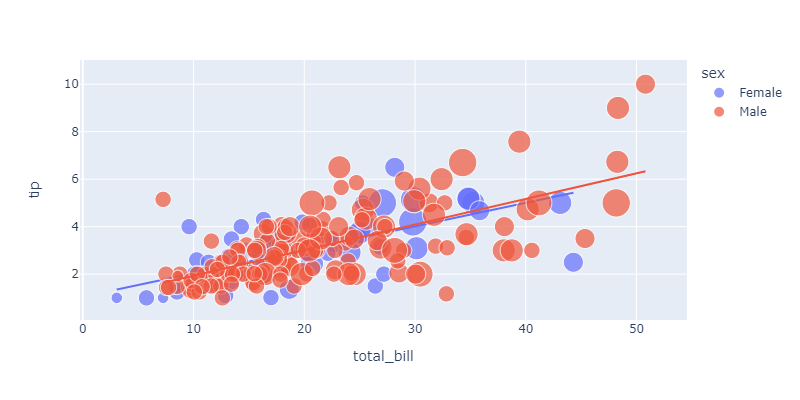

In [ ]:
# Visualizing the relationship between total_bill and time with the tip.
px.scatter(data_frame = data1, x='total_bill', y='tip', size='size', color= 'time', trendline='ols',width=800, height=400)

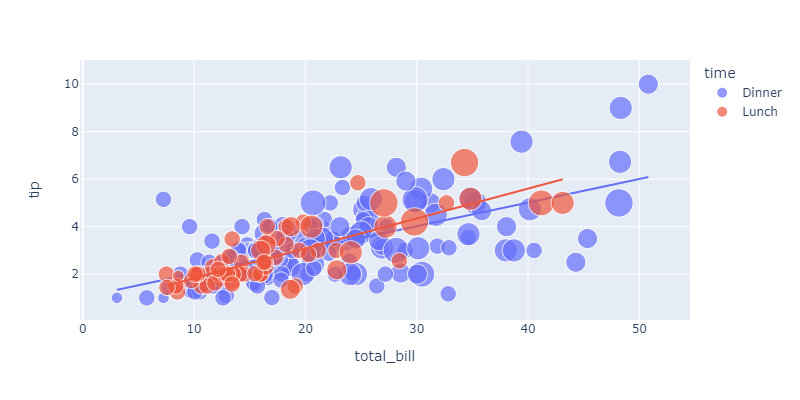

In [ ]:
# Changing data types from categorical to numerical.
data['sex'] = data['sex'].map({'Female': 0, 'Male': 1})
data['smoker'] = data['smoker'].map({'No': 0, 'Yes': 1})
data['day'] = data['day'].map({'Thur': 0, 'Fri': 1,'Sat':2,'Sun':3})
data['time'] = data['time'].map({'Dinner': 0, 'Lunch': 1})

data1['sex'] = data1['sex'].map({'Female': 0, 'Male': 1})
data1['smoker'] = data1['smoker'].map({'No': 0, 'Yes': 1})
data1['day'] = data1['day'].map({'Thur': 0, 'Fri': 1,'Sat':2,'Sun':3})
data1['time'] = data1['time'].map({'Dinner': 0, 'Lunch': 1})
data1.head()

data.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,0,0,3,0,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,1,0,3,0,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,1,0,3,0,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,1,0,3,0,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,0,0,3,0,4,6.15,Tonya Carter,4832732618637221,Sun2251


Text(0.5, 1.0, 'Correlation Heatmap')

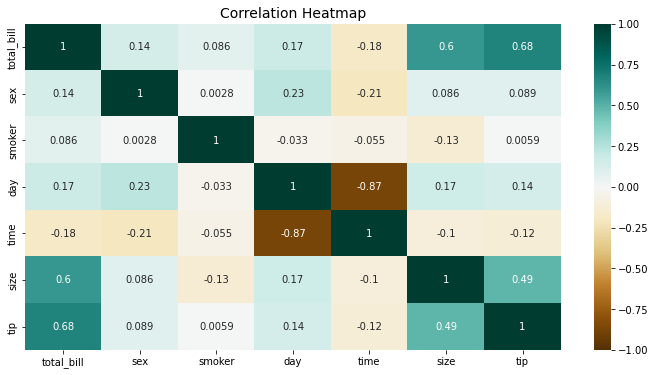

In [ ]:
plt.figure(figsize=(12,6))
heatmap = sns.heatmap(data1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14})

In [ ]:
# Splitting the dataset into features and target.
x = data[['total_bill','sex','smoker','day','time','size']]
y = data[['tip']]

In [ ]:
# Features.
x.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,3,0,2
1,10.34,1,0,3,0,3
2,21.01,1,0,3,0,3
3,23.68,1,0,3,0,2
4,24.59,0,0,3,0,4


In [ ]:
# Target.
y.head()

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


In [ ]:
# Splitting the data into train and test datasets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42, train_size=0.9)
print('X_train:',len(X_train))
print('X_test:',len(X_test))

X_train: 219
X_test: 25


In [ ]:
# Fitting a Linear Regression model with train data.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting with test data.
pred = model.predict(X_test)
pred

array([[2.90669944],
       [1.91368033],
       [3.78434497],
       [3.71781672],
       [2.22141763],
       [2.65243822],
       [3.66234512],
       [2.30397813],
       [2.48764818],
       [2.32179435],
       [2.82286068],
       [2.0424051 ],
       [2.12920922],
       [2.32677593],
       [1.89199752],
       [3.07409175],
       [2.91492978],
       [3.13706271],
       [2.61848275],
       [5.55768034],
       [3.38705272],
       [3.16778667],
       [2.28188657],
       [1.92589249],
       [3.15534562]])

In [ ]:
# Measuring the model.
from sklearn.metrics import mean_absolute_error
round(mean_absolute_error(y_test, pred),2)

0.68

In [ ]:
# Creating new data for the model to predict and showing the prediction.

# We can test the model with any numbers here.
features = np.array([[24, 1, 0, 0, 1, 4]])

result = model.predict(features)
print(np.round(result, decimals=2))

[[3.73]]
